<a href="https://colab.research.google.com/github/Elman295/Dog_emotions_prediction/blob/main/Dog_emotions_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Dataset`

This dataset is part of dataquest project-walkthrough. Images are downloaded from Flickr using API. where Idog images are classified into 4 category based on their emotions. these 4 category are :

1 - happy <br/>
2 - sad  <br/>
3 - angry <br/>
4 - relaxed

Source : https://www.kaggle.com/datasets/devzohaib/dog-emotions-prediction




In [38]:
import tensorflow as tf
import zipfile
import os
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
with zipfile.ZipFile("archive (1).zip","r") as file:
  file.extractall("data")

In [40]:
images = os.path.join("data","images")
os.listdir(images)

['happy', 'relaxed', 'sad', 'angry']

In [41]:
raw_train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = images,
    seed = 32,
    validation_split = 0.2,
    image_size = (60,60),
    subset="training"
)

Found 15921 files belonging to 4 classes.
Using 12737 files for training.


In [42]:
raw_val_ds = tf.keras.utils.image_dataset_from_directory(
    directory = images,
    seed= 32,
    validation_split=0.2,
    image_size=(60,60),
    subset = "validation"
)

Found 15921 files belonging to 4 classes.
Using 3184 files for validation.


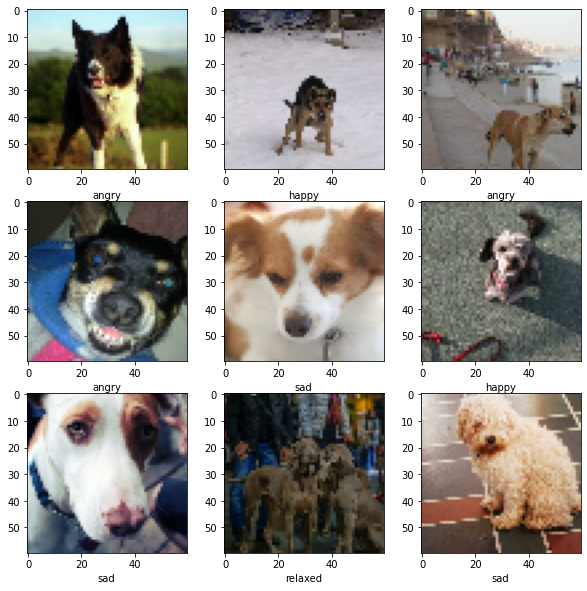

In [43]:
plt.figure(figsize=(10,10))
class_names = raw_train_ds.class_names
for images,label in raw_train_ds.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.xlabel(class_names[label[i]])
    plt.grid(False)
    

In [44]:
optimization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = raw_train_ds.map(lambda x,y : (optimization_layer(x),y))
val_ds = raw_val_ds.map(lambda x,y : (optimization_layer(x),y))

In [45]:
model = tf.keras.models.Sequential([
    #first_layer
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),

    #second_layer
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),

    #third_layer 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(4,activation="softmax")
])

In [46]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimization = tf.keras.optimizers.Adam()

In [47]:
model.compile(
    optimizer=optimization,
    loss=loss,
    metrics=["accuracy"]
)

In [48]:
history = model.fit(train_ds,epochs=20)

Epoch 1/20
399/399 [==============================] - 112s 279ms/step - loss: 1.3478 - accuracy: 0.3146
Epoch 2/20
399/399 [==============================] - 112s 281ms/step - loss: 1.3218 - accuracy: 0.3645
Epoch 3/20
399/399 [==============================] - 113s 282ms/step - loss: 1.3032 - accuracy: 0.3885
Epoch 4/20
399/399 [==============================] - 112s 280ms/step - loss: 1.2805 - accuracy: 0.4028
Epoch 5/20
399/399 [==============================] - 112s 280ms/step - loss: 1.2468 - accuracy: 0.4302
Epoch 6/20
399/399 [==============================] - 111s 278ms/step - loss: 1.1777 - accuracy: 0.4740
Epoch 7/20
399/399 [==============================] - 112s 279ms/step - loss: 1.0550 - accuracy: 0.5451
Epoch 8/20
399/399 [==============================] - 112s 280ms/step - loss: 0.8643 - accuracy: 0.6440
Epoch 9/20
399/399 [==============================] - 113s 282ms/step - loss: 0.6504 - accuracy: 0.7444
Epoch 10/20
399/399 [==============================] - 112s 280m

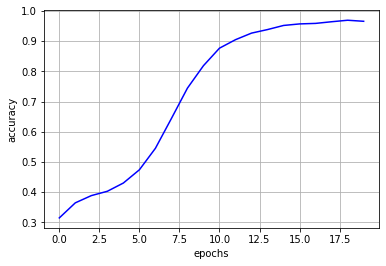

In [49]:
plt.plot(history.history["accuracy"], color="blue")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()
plt.show()

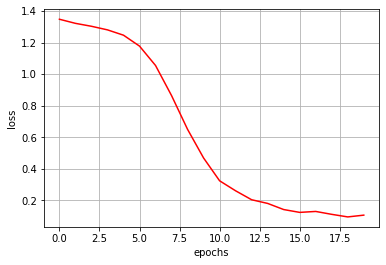

In [50]:
plt.plot(history.history["loss"], color="red")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()
plt.show()

In [52]:
model.evaluate(val_ds,verbose=10)

[7.649988174438477, 0.3250628113746643]

In [53]:
model.save("Dog.h5")